# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

## Szyfr Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

In [11]:
# Alfabet jawny i szyfrowy 
alphabets = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

alphabet_size = 26

plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

ciphertext = ""

key = 15 #przesunięcie permutacji czyli klucz szyfrowania 

print("Tekst jawny: ", plaintext)

for text in plaintext.lower().split():
    for char in text:
        ciphertext = ciphertext + alphabets[(alphabets.index(char) + key) % alphabet_size] 
print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

decodedtext = ""
for text in ciphertext:
    for char in text:
        decodedtext = decodedtext + alphabets[(alphabets.index(char)- key) % alphabet_size]
print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

Tekst jawny:  TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem
Szyfrogram:  idqtdgcdiidqtiwpixhiwtfjthixdclwtiwtgixhcdqatgxciwtbxcsidhjuutgiwthaxcvhpcspggdlhdudjigpvtdjhudgijctdgidipztpgbhpvpxchiphtpduigdjqathpcsqndeedhxcvtcsiwtb (spacje usunięte)
Odszyfrowana wiadomość:  tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem (spacje usunięte)


## Szyfr monoalfabetyczny: 
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

### Zastanów się:
1. Czy szyfr Cezara jest łatwy do złamania? Ile prób (testów przesunięć) trzeba aby złamać szyfr Cezara?
2. Co to jest atak siłowy (__brute force__)?  
3. Zaproponuj i zaimplementuj wariant szyfru Cezara, która wymaga wykonania większej liczby prób podczas ataku?  
4. Oceń koszt ataku na ten wariant Cezara.

In [12]:
# lepszy Cezar
import numpy

alphabet = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

permuted_alphabet = list(numpy.random.permutation(alphabet))

alphabet_size = len(permuted_alphabet)

plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

ciphertext_permuted = ""

key = 15 #przesunięcie permutacji czyli klucz szyfrowania 

print("Tekst jawny: ", plaintext)

for text in plaintext.lower().split():
    for char in text:
        ciphertext_permuted = ciphertext_permuted + permuted_alphabet[(permuted_alphabet.index(char) + key) % alphabet_size] 
print("Szyfrogram: ",  ciphertext_permuted, "(spacje usunięte)")

decodedtext_permuted = ""
for text in ciphertext:
    for char in text:
        decodedtext_permuted = decodedtext_permuted + permuted_alphabet[(permuted_alphabet.index(char)- key) % alphabet_size]
print("Odszyfrowana wiadomość: ",  decodedtext_permuted,  "(spacje usunięte)")

Tekst jawny:  TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem
Szyfrogram:  rkgfkmskrrkgfrwpruxrwflefxruksbwfrwfmruxskgnfmusrwfyusvrkxeccfmrwfxnustxpsvpmmkbxkckermptfkexckmresfkmrkrpzfpmyxptpusxrpxfpkcrmkegnfxpsvgjkhhkxustfsvrwfy (spacje usunięte)
Odszyfrowana wiadomość:  zjvgjbfjzzjvgzhazspzhgeygpzsjfqhgzhgbzspfjvcgbsfzhgwsfnzjpyiigbzhgpcsfdpafnabbjqpjijyzbadgjypijbzyfgjbzjzakgabwpadasfpzapgajizbjyvcgpafnvljuujpsfdgfnzhgw (spacje usunięte)


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć. 

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach. 

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu. 

# Problem
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

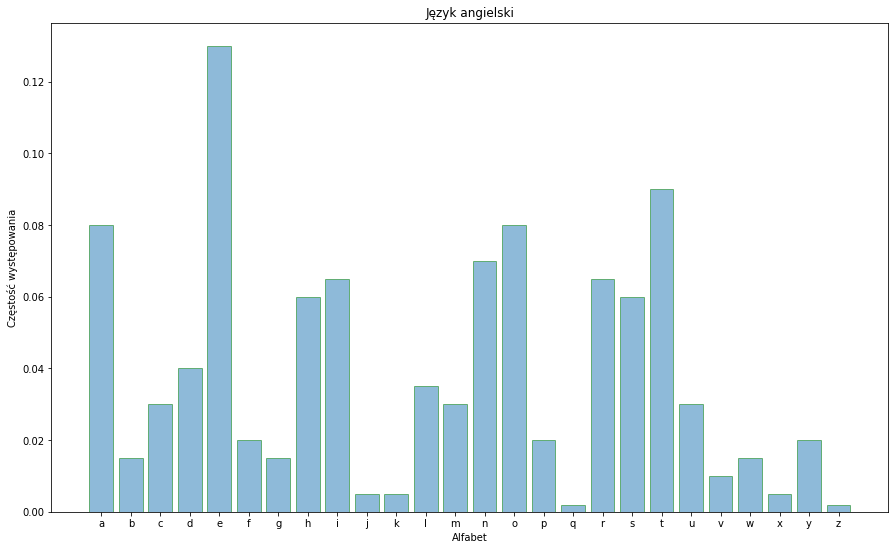

In [13]:
from matplotlib import pyplot as plt
import numpy as np

letters =   ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
labels = np.arange(len(letters))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym przesunięciem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej. 
3. Dokonaj analizy częstości występowania liter w szyfrogramie wygenerowanym przez "ulepszonego Cezara"

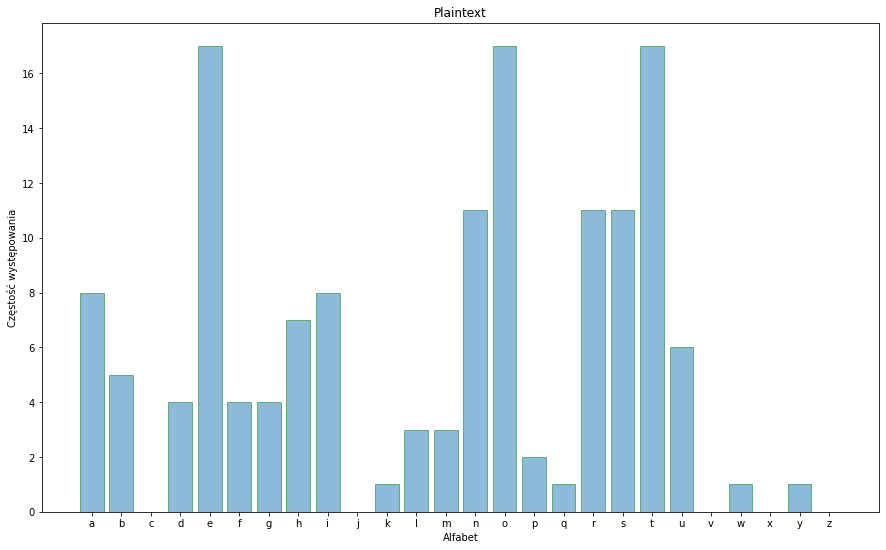

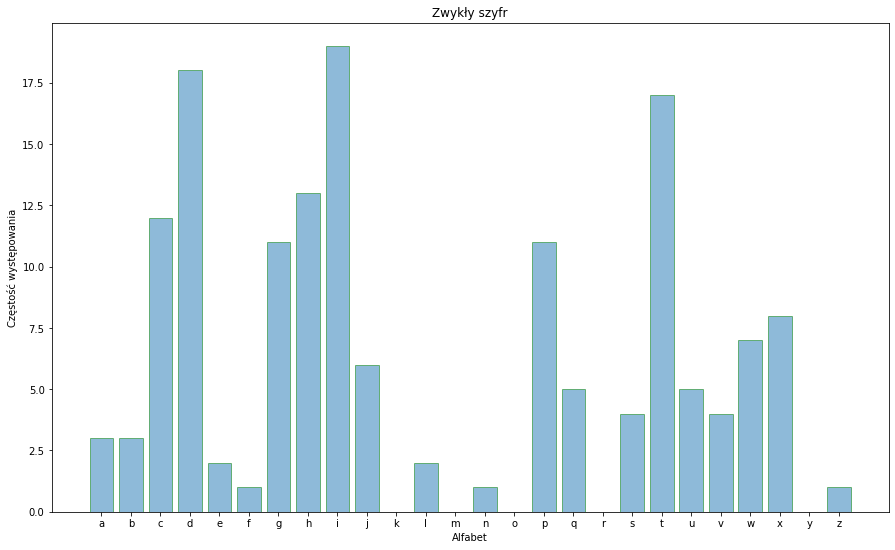

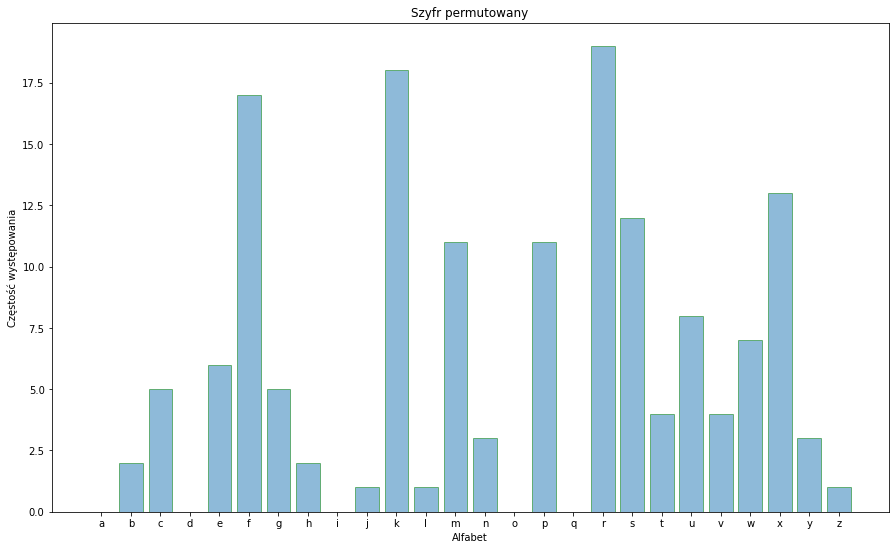

In [14]:
import numpy as np
from matplotlib import pyplot as plt

plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

Alphabet = [
    'a','b','c','d','e','f','g','h','i','j','k','l','m',
    'n','o','p','q','r','s','t','u','v','w','x','y','z'
]
Frequency = []
Frequency_classic = []
Frequency_permuted = []

for i in range(0,26):
    Frequency.append(plaintext.count(Alphabet[i]))

for i in range(0,26):
    Frequency_classic.append(ciphertext.count(Alphabet[i]))

for i in range(0,26):
    Frequency_permuted.append(ciphertext_permuted.count(Alphabet[i]))

labels = np.arange(len(Alphabet))
plt.figure(figsize=(15,9))
plt.bar(labels, Frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Plaintext");
plt.ylabel('Częstość występowania')
plt.show()


labels = np.arange(len(Alphabet))
plt.figure(figsize=(15,9))
plt.bar(labels, Frequency_classic, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Zwykły szyfr");
plt.ylabel('Częstość występowania')
plt.show()

labels2 = np.arange(len(Alphabet))
plt.figure(figsize=(15,9))
plt.bar(labels, Frequency_permuted, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Szyfr permutowany");
plt.ylabel('Częstość występowania')
plt.show()
# policz częstość i wyświetl rozkłady 

### Przykład: 
Automatyczna kryptoanaliza tekst zaszyfrowanego zwykłym Cezarem

In [15]:
import nltk
nltk.download('words')
from nltk.corpus import words


unique = []
frequency = []
psi = []
key = 0
value = 0.0
exit = True

ciphertext = "odggd".lower()

alphabets = "abcdefghijklmnopqrstuvwxyz"

english_frequency_prob = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 
                          0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 
                          0.030, 0.010, 0.015, 0.005, 0.020, 0.002]



for char in ciphertext: #lista liter w szyfrogramie
    if (char not in unique) and (char.isalpha()):
        unique.append(char)
        
only_alphabets = [char for char in ciphertext if char.isalpha()]  #tylko litery

for unique_char in unique: #częstość liter w tekście 
     frequency.append(ciphertext.count(unique_char) / (float)(len(only_alphabets)))

for i in range(0,26): #oblicz dopasowanie
    for unique_char in unique:
         value = value + frequency[unique.index(unique_char)] * english_frequency_prob[alphabets.index(unique_char) - i]
    psi.append(value)  
    value = 0.0
    
sorted_psi = psi[:] # sortuj dopasowanie
sorted_psi.sort(reverse=True)

decoded_string = ""
for i in range(0, 26):
    key = psi.index(sorted_psi[i])
    decoded_string = ""
    for char in ciphertext:
        if (char != ' '):
            decoded_string = decoded_string + alphabets[alphabets.index(char) - key]
        else:
            decoded_string = decoded_string + " "
            
    print("Próba klucza: ", key, " ....", decoded_string)
    
    for word in decoded_string.split():
        if word not in words.words(): #czy szyfrowanie ma sens
            exit = False
        else:
            exit = True
    if exit:
        break
        
print("\n", "Decoded string: ", decoded_string)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\magda\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Próba klucza:  25  .... pehhe
Próba klucza:  10  .... etwwt
Próba klucza:  2  .... mbeeb
Próba klucza:  15  .... zorro

 Decoded string:  zorro


## Podsumowanie 
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter. 

# Problem
1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekst jawnego?_


YVTJXYFTGBCXTHLUMJBQPAUDJZGEWQIPYGMLINBFFCXZJNCLKMFGRQQPIQZHZRAWEMFIVPBTWLWFMTFQATGQQBTXCYBZXMGWCBFJBZHKIOOYTSVPICERSZGWAHMWZGWVLVERKOJRGUINGTTCWJRJXRMGG
TOBEORNOTTOBETHATISTHEQUESTIONWHETHERTISNOBLERINTHEMINDTOSUFFERTHESLINGSANDARROWSOFOUTRAGEOUSFORTUNEORTOTAKEARMSAGAINSTASEAOFTROUBLESANDBYOPPOSINGENDTHEM


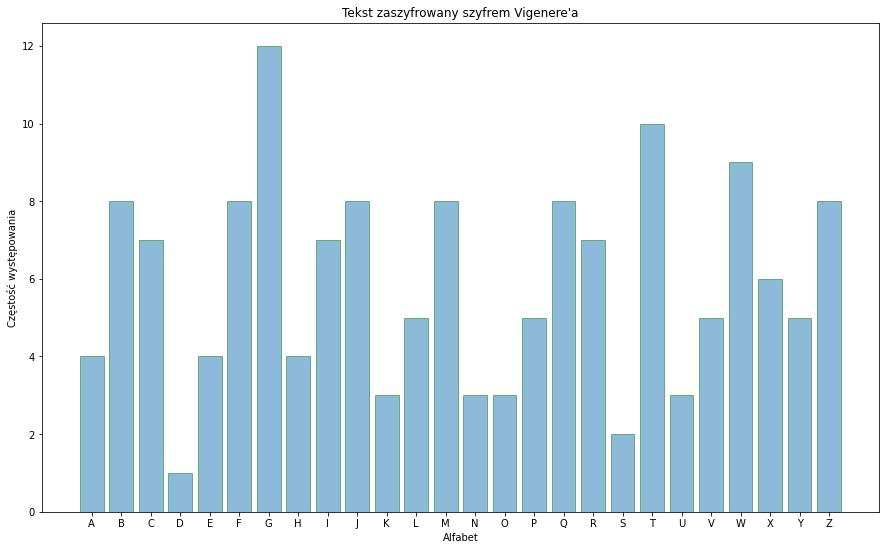

In [24]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".upper()

def generateKey(plaintext, key): 
    if len(plaintext) <= len(key): 
        return key 
    else: 
        x = len(plaintext)//len(key) + 1
        return key*x

def encrypt(plaintext, key):
    plaintext = list(plaintext)
    key = list(key)
    ciphertext = []
    for i in range(len(plaintext)):
        newalpahbet = alphabet[alphabet.index(key[i]):] + alphabet[:alphabet.index(key[i])]
        # print(newalpahbet)
        ciphertext.append(newalpahbet[alphabet.index(plaintext[i])])
    return ''.join(ciphertext)

def decrypt(ciphertext, key):
    ciphertext = list(ciphertext)
    key = list(key)
    decrypted = []
    for i in range(len(plaintext)):
        newalpahbet = alphabet[alphabet.index(key[i]):] + alphabet[:alphabet.index(key[i])]
        decrypted.append(alphabet[newalpahbet.index(ciphertext[i])])
    return ''.join(decrypted)
        
plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"
text = "fhsfjhsfniowpoeutbjxiwejfhnwidmiunfhrutnsowofwuyrfbujdnwuyfcunjdxinxncvbwytfvcruifbcwicxwunf"
key = generateKey(plaintext, text)
ciphertext = encrypt(plaintext.upper(), key.upper())
print(ciphertext)
decrypted = decrypt(ciphertext.upper(), key.upper())
print(decrypted)
freq = []

for i in range(0,26):
    freq.append(ciphertext.count(alphabet[i]))

labels = np.arange(len(alphabet))
plt.figure(figsize=(15,9))
plt.bar(labels, freq, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'))
plt.title("Tekst zaszyfrowany szyfrem Vigenere'a");
plt.ylabel('Częstość występowania')
plt.show()

### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogrami. 
2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.
    Jeśli klucz będzie krótszy od tekstu, w końcu pewne wzorce zaczną się powtarzać i kryptoanalityk będzie w stanie odgadnąć że powtarzające sie fragmenty tekstu zostały zaszyfrowane tym samym kluczem.
3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy? 
    Tak (wyjaśnienie jak wyżej)
4. Jaki klucz gwarantowałby bezpieczeństwo?
    O długości większej lub równej długości tekstu, całkowicie losowy i jednorazowy
5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi? 
    Każda litera powtarza się mniej więcej podobną liczbę razy

### Szyfr polialfabetyczny 
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym są zamieniane na litery odpowiadające im w alfabecie aktualnym w momencie szyfrowania danej litery (zmianę alfabetu określa klucz) - te same litery nie będą zawsze zamienione na tą samą_

### Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania? 
    - bezpieczeństwo szyfru nie może polegać na nienajomości algorytmu szyfrowania
    - analiza szyfrogramu nie może dostarczać zadnych informacji na temat tekstu jawnego
    - wszystkie teksty muszą być tak samo prawdopodobne

## Zadanie (dodatkowe, na ocenę)
1. Napisz notebook jupyter, które implementuje klasyczne szyfry mechaniczne: Enigma, szyfr Playfair, szyfr maszyny Lorenza. W sieci można łatwo znaleźć gotowe kody, wiec przy ocenie zwracam uwagę no dokładne omówienie kodu, przejrzystość, komentarze etc. 